In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
visa_df=pd.read_csv(r"C:\Users\Almannan\OneDrive\NareshIT\DSAIML\DataFiles\Visadataset.csv")
visa_df


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [7]:
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)

iqr=q3-q1

lb=q1-1.5*iqr
ub=q1+1.5*iqr

con1=visa_df['prevailing_wage']<lb
con2=visa_df['prevailing_wage']>ub

non_outliers_data=visa_df[con1|con2]


In [8]:
len(non_outliers_data)

2173

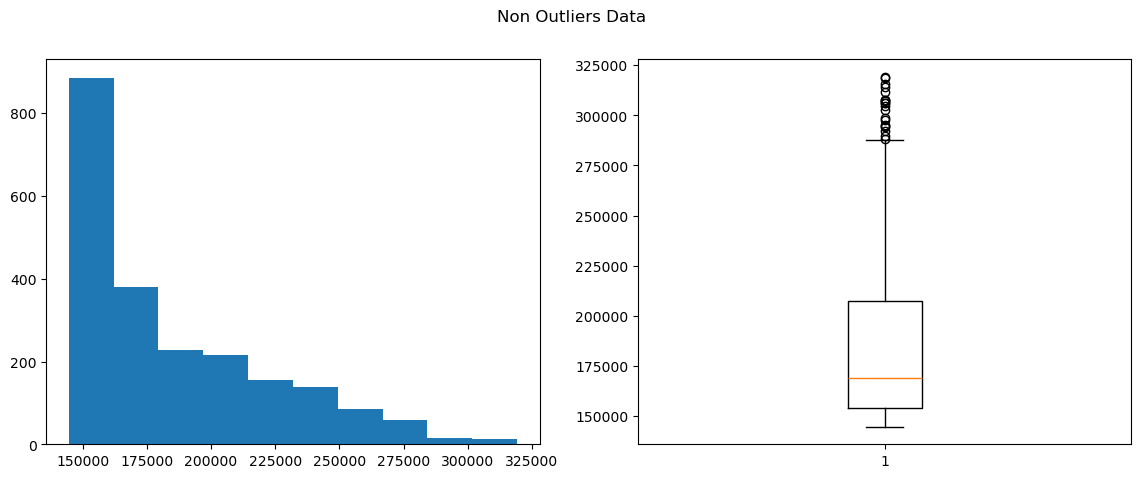

In [11]:
plt.figure(figsize=(14,5))
plt.suptitle("Non Outliers Data")
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

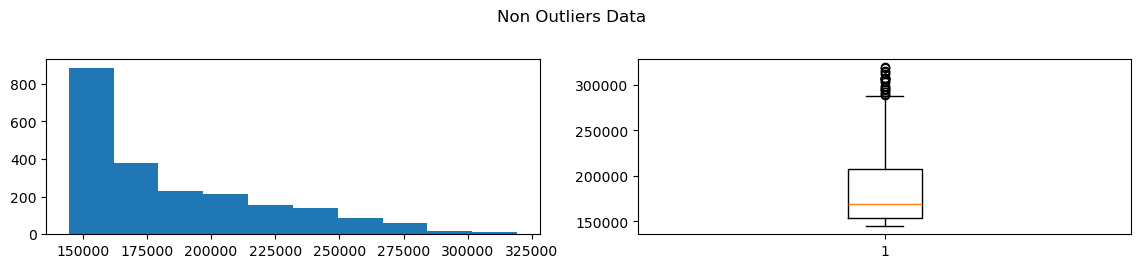

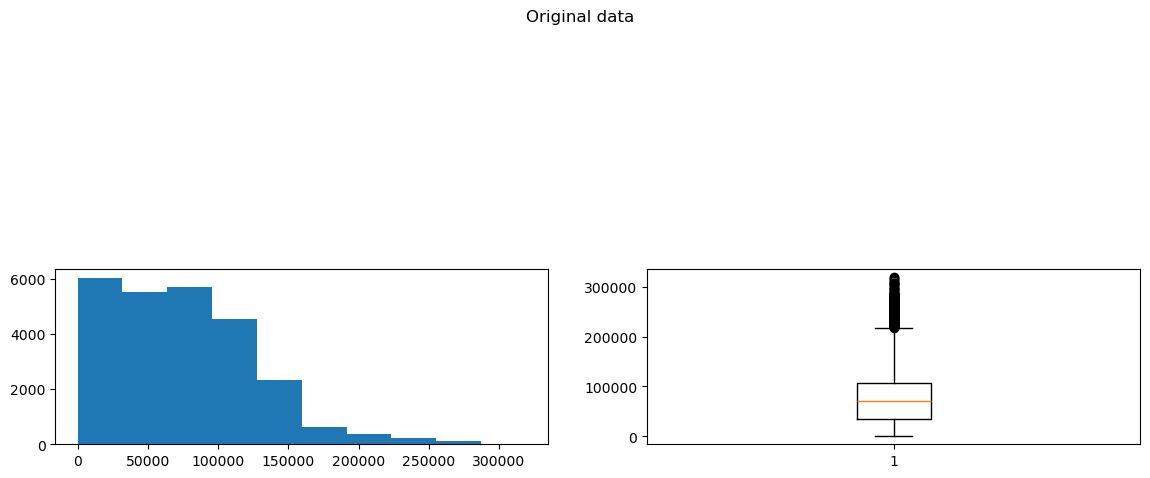

In [14]:
plt.figure(figsize=(14,5))
plt.suptitle("Non Outliers Data")
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'])

plt.figure(figsize=(14,5))zamil123


**How to deal with Outliers**

- **Method 1**

- Drop the Outliers is not a good idea

- When you drop the outliers, data will loss

- for example, here we are dropping 427 rows 427/25000

- It is 1.708% data, is okay to drop the outliers as it is less

**Method 2 - Fill with Median value**


- we already know that outliers does not affect the median

- so we can fill outliers by median

**Method 3 - Cap the values with Q1 and Q3**

- all less than lower bound values can be replaced with q1 or LB

- all greated thatn upper bound values can be replaced wiht q3 or UB
- 

-  

**Fill with Median**

- create a empty list

- - Iterate the visa_df['prevailing_wage'].values
 
  - if each value < lb or >ub then append with median valuuees
 
  - else append with i value
 
  - 

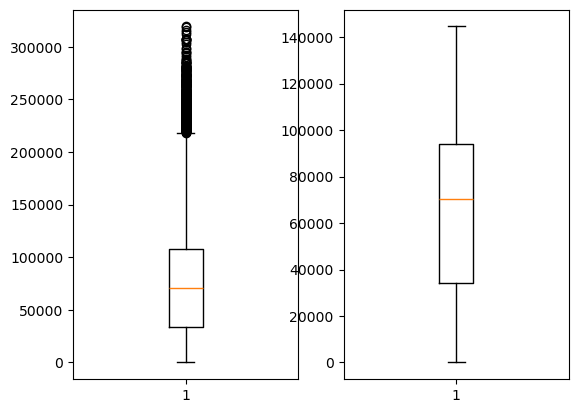

In [29]:
ol=[]
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
median=visa_df['prevailing_wage'].median()
iqr=q3-q1

lb=q1-1.5*iqr
ub=q1+1.5*iqr
for i in visa_df['prevailing_wage'].values:
    if(i<lb or i>ub):
        ol.append(median)
    else:
        ol.append(i)

visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage']=ol
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()

In [27]:
len(ol)

25480

In [31]:
print(round(visa_df['prevailing_wage'].mean(),2),round(visa_df_copy['prevailing_wage'].mean(),2))

74455.81 64747.89


In [32]:
np.where

<function where at 0x000001C6000194F0>

**np.where***

- np.where will use for binary condition

- It had 3 arguments

- 1. condition

  2. value if condition is true
 
  3. value if condition is false

In [33]:
d={"sub":["DS","ML","CS"],"Marks":[100,150,20]}

In [35]:
data=pd.DataFrame(d)

In [38]:
con=data['Marks']>100
l=np.where(con, 1,data['Marks'])
l



array([100,   1,  20], dtype=int64)

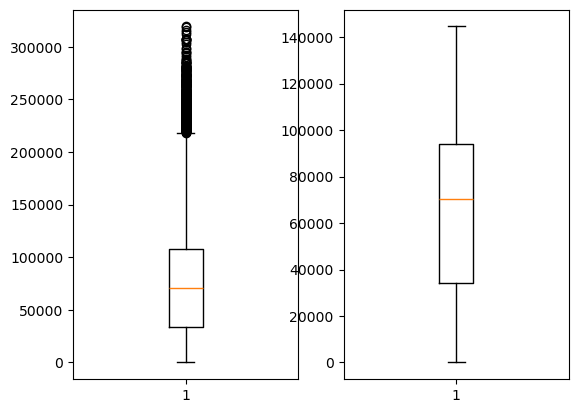

In [51]:
ol=[]
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
median=visa_df['prevailing_wage'].median()
iqr=q3-q1

lb=q1-1.5*iqr
ub=q1+1.5*iqr
con1=visa_df['prevailing_wage']<lb
con2 = visa_df['prevailing_wage']>ub
con=con1|con2
ol= np.where(con, median,visa_df['prevailing_wage'])

visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage']=ol
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()


In [52]:
print(round(visa_df['prevailing_wage'].mean(),2),round(visa_df_copy['prevailing_wage'].mean(),2))

74455.81 64747.89
